In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import jet
import matplotlib as mpl

In [19]:
# Set font size
mpl.rcParams['font.size'] = 12

# Set font
plt.rcParams['font.family'] = 'Arial'

cmap = jet

In [20]:
# グset graph size
golden_ratio = (1 + 5 ** 0.5) / 2
fig_width = 8  # set width
fig_height = fig_width / golden_ratio

Available xls files:
1: B4_FET - Clarius.xls
2: A5_FET - Clarius.xls
3: B1_FET - Clarius.xls
4: A1_FET - Clarius.xls
5: B5_FET - Clarius.xls
6: D3_FET - Clarius.xls
7: A4_FET - Clarius.xls
8: A2_FET - Clarius.xls
9: B3_FET - Clarius.xls
10: D5_FET - Clarius.xls
11: A3_FET - Clarius.xls
12: B2_FET - Clarius.xls
13: D4_FET - Clarius.xls
14: C2_FET - Clarius.xls
15: A1HYS_FET - Clarius.xls
16: C3_FET - Clarius.xls
17: C1_FET - Clarius.xls
WARNING *** file size (42210) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


IndexError: index 5 is out of bounds for axis 0 with size 4

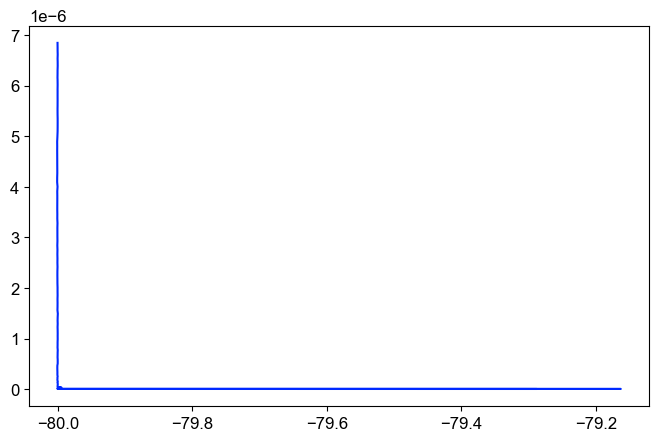

In [21]:
directory_path = os.path.dirname(os.path.abspath('/Users/azaleauva/Desktop/Helen Tran - 2020 Azalea Uva/Raw Data/Graphing/spectrometry-visualizer/OFET data/FET/p(TT-TII-2,6ND)-H/Vac/OUTPUT'))

# Get list of xls files in specified directory
xls_files = [f for f in os.listdir(directory_path) if f.endswith('.xls')]

if not xls_files:
    print("No xls files were found in the directory.")
else:
    print("Available xls files:")
    for i, xls_file in enumerate(xls_files):
        print(f"{i + 1}: {xls_file}")

    # Enter index of user-selected file
    selected_index = int(input("Select the number of files to plot: ")) - 1

    if 0 <= selected_index < len(xls_files):
        selected_file = xls_files[selected_index]

        # Select p or n
        polarity = input("Select the polarity of the data to plot (p or n):")

        # Load xls file
        xls_path = os.path.join(directory_path, selected_file)
        df = pd.read_excel(xls_path)

        # Set plot
        plt.figure(figsize=(fig_width, fig_height))
        for n in range(1, 7):
            x_column = df.columns[4 * n - 3]
            y_column = df.columns[4 * n - 4]

            if polarity == 'p':
                # If polarity is p, multiply the y-axis value by -1
                df[y_column] = -df[y_column]
                # Set legend name (-20(n-1) in the range n=1 to 6)
                if n == 1:
                    legend_name = f'$V_G$ = {-20 * (n - 1)} V'
                else:
                    legend_name = f'{-20 * (n - 1)} V'
            else:
                if n == 1:
                    legend_name = f'$V_G$ = {20 * (n - 1)} V'
                else:
                    legend_name = f'{20 * (n - 1)} V'
                
            color = cmap(n / len(y_column)) 
            plt.plot(df[x_column], df[y_column], color=color, label=legend_name)
        
        plt.xlabel(r"V$_{DS}$ (V)", fontsize="x-large")
        plt.ylabel(r"|I$_{DS}$| (A)", fontsize="x-large")
        plt.legend()
        plt.xlim(-100, 5)
        plt.ylim(df[y_column].min()/50, )
        # plt.title("output")
        # plt.figure(figsize=(fig_width, fig_height))
        
        # Save the graph in 300dpi JPEG format (save in the current directory)
        output_filename = os.path.join(directory_path, "output_graph.jpg")
        plt.savefig(output_filename, dpi=300, format='jpeg')

        plt.show()
    else:
        print("An invalid file number was selected.")